## Q1:Equalize the histogram of the 8 × 8 image below. The image has grey levels 0, 1, . . . , 7.

# Visualize both the original and equalized images

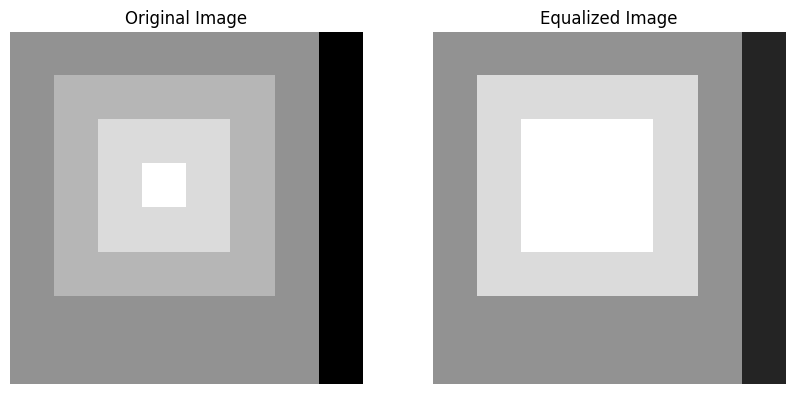

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Original image array
original_image = np.array([
    [4, 4, 4, 4, 4, 4, 4, 0],
    [4, 5, 5, 5, 5, 5, 4, 0],
    [4, 5, 6, 6, 6, 5, 4, 0],
    [4, 5, 6, 7, 6, 5, 4, 0],
    [4, 5, 6, 6, 6, 5, 4, 0],
    [4, 5, 5, 5, 5, 5, 4, 0],
    [4, 4, 4, 4, 4, 4, 4, 0],
    [4, 4, 4, 4, 4, 4, 4, 0]
])

# Equalized image based on histogram equalization
equalized_image = np.array([
    [4, 4, 4, 4, 4, 4, 4, 1],
    [4, 6, 6, 6, 6, 6, 4, 1],
    [4, 6, 7, 7, 7, 6, 4, 1],
    [4, 6, 7, 7, 7, 6, 4, 1],
    [4, 6, 7, 7, 7, 6, 4, 1],
    [4, 6, 6, 6, 6, 6, 4, 1],
    [4, 4, 4, 4, 4, 4, 4, 1],
    [4, 4, 4, 4, 4, 4, 4, 1]
])

# Plot the original and equalized images
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Display original image
axs[0].imshow(original_image, cmap='gray', vmin=0, vmax=7)
axs[0].set_title("Original Image")
axs[0].axis('off')

# Display equalized image
axs[1].imshow(equalized_image, cmap='gray', vmin=0, vmax=7)
axs[1].set_title("Equalized Image")
axs[1].axis('off')

plt.show()


## Q3 Visualizing the continuous and discrete Laplacian   

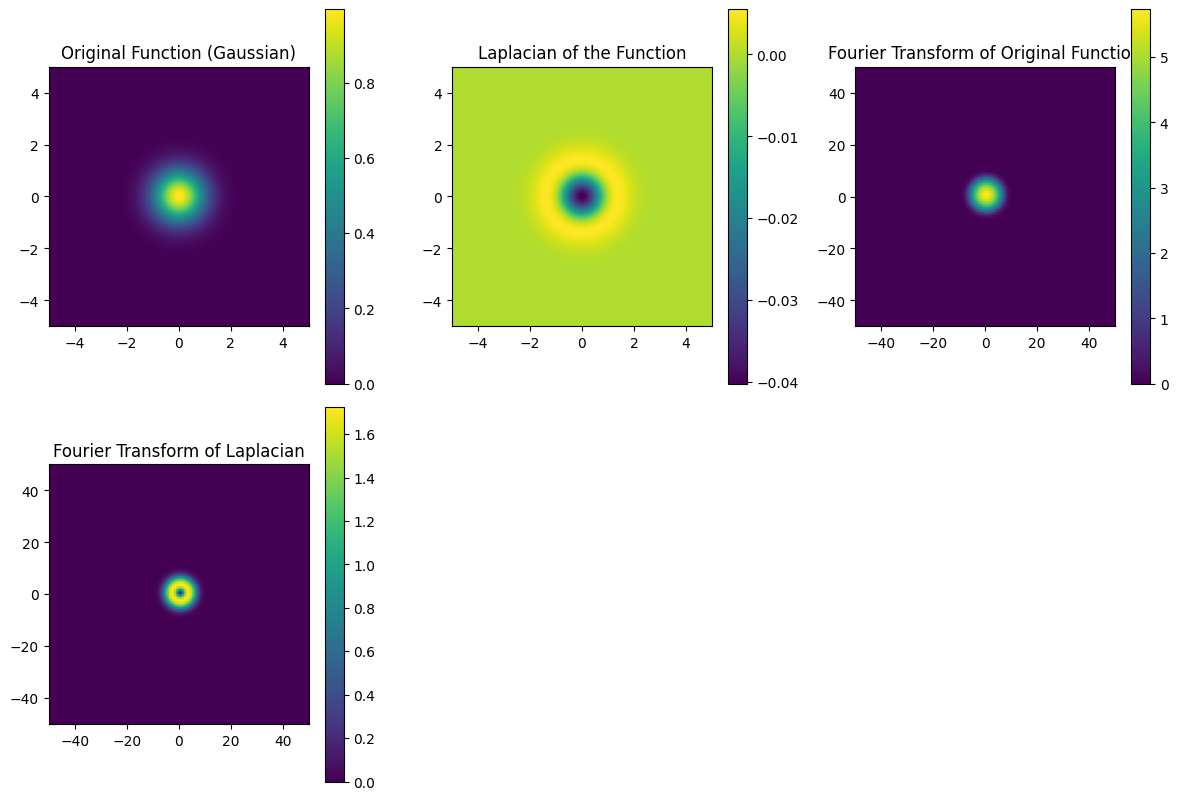

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft2, ifft2, fftshift

# Step 1: Create a sample 2D function (Gaussian)
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = np.exp(-X**2 - Y**2)  # Gaussian function

# Step 2: Define the discrete Laplacian operator
def discrete_laplacian(f):
    return (
        f[2:, 1:-1] + f[:-2, 1:-1] + f[1:-1, 2:] + f[1:-1, :-2] - 4 * f[1:-1, 1:-1]
    )

# Calculate the discrete Laplacian
Z_laplacian = np.zeros(Z.shape)
Z_laplacian[1:-1, 1:-1] = discrete_laplacian(Z)

# Step 3: Compute the Fourier transform
F_original = fftshift(fft2(Z))
F_laplacian = fftshift(fft2(Z_laplacian))

# Magnitudes for visualization
F_original_magnitude = np.abs(F_original)
F_laplacian_magnitude = np.abs(F_laplacian)

# Step 4: Plot the results
plt.figure(figsize=(12, 12))

plt.subplot(3, 3, 1)
plt.title('Original Function (Gaussian)')
plt.imshow(Z, extent=(-5, 5, -5, 5), origin='lower', cmap='viridis')
plt.colorbar()

plt.subplot(3, 3, 2)
plt.title('Laplacian of the Function')
plt.imshow(Z_laplacian, extent=(-5, 5, -5, 5), origin='lower', cmap='viridis')
plt.colorbar()

plt.subplot(3, 3, 3)
plt.title('Fourier Transform of Original Function')
plt.imshow(np.log(F_original_magnitude + 1), extent=(-50, 50, -50, 50), origin='lower', cmap='viridis')
plt.colorbar()

plt.subplot(3, 3, 4)
plt.title('Fourier Transform of Laplacian')
plt.imshow(np.log(F_laplacian_magnitude + 1), extent=(-50, 50, -50, 50), origin='lower', cmap='viridis')
plt.colorbar()

plt.tight_layout()
plt.show()


## Q5:Implement and test my algorithm.


Text(0.5, 1.0, 'original lena')

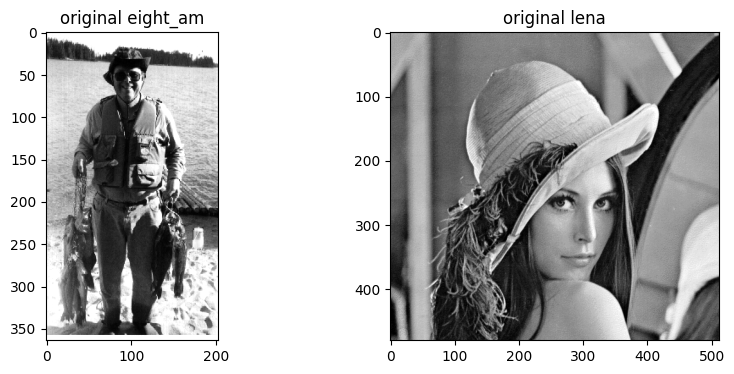

In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import exposure

# Function to plot histograms for visualizing the solution
def plot_histogram(image, title):
    plt.hist(image.ravel(), bins=256, range=(0, 256), color='gray')
    plt.title(title)
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")


# Load the images in grayscale
eight_am = cv2.imread("EightAM.png", cv2.IMREAD_GRAYSCALE)
lena = cv2.imread("LENA.png", cv2.IMREAD_GRAYSCALE)

# Display the original images
plt.figure(figsize=(10, 4))
plt.subplot(1, 2,1)
plt.imshow(eight_am, cmap='gray')
plt.title("original eight_am")
plt.subplot(1, 2, 2)
plt.imshow(lena, cmap='gray')
plt.title("original lena")

(A) .Equalize the image EightAM image

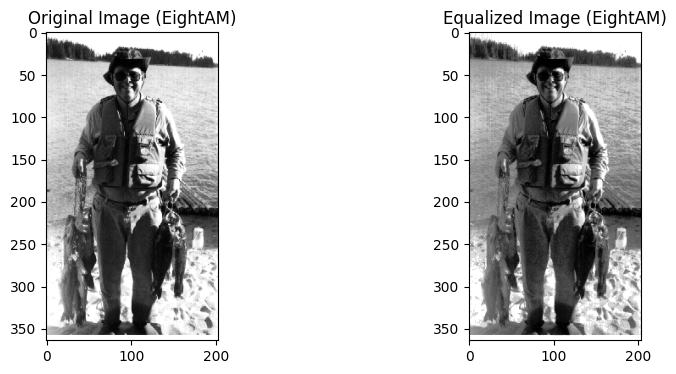

In [24]:
equalized_img = cv2.equalizeHist(eight_am)

# original image VS equalized image
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(eight_am, cmap='gray')
plt.title("Original Image (EightAM)")

plt.subplot(1, 2, 2)
plt.imshow(equalized_img, cmap='gray')
plt.title("Equalized Image (EightAM)")

plt.show()

Original histogram  VS equalized histogram for EightAM

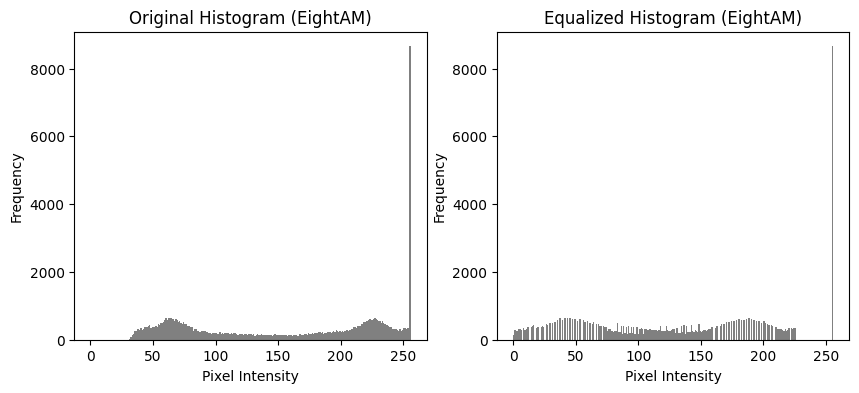

In [25]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plot_histogram(eight_am, "Original Histogram (EightAM)")

plt.subplot(1, 2, 2)
plot_histogram(equalized_img, "Equalized Histogram (EightAM)")

plt.show()

 (b) Histogram Matching to make EightAM match LENA

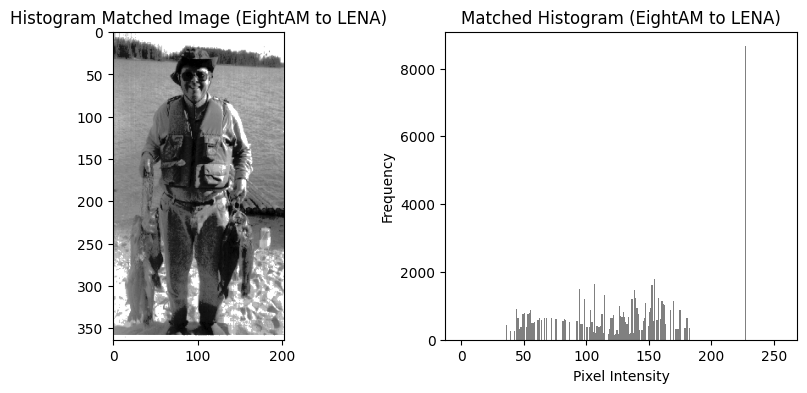

In [ ]:
#histogram matching
matched_img = exposure.match_histograms(eight_am,lena)

# show the matched image and histogram for EightAM
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(matched_img, cmap='gray')
plt.title("Histogram Matched Image (EightAM to LENA)")

plt.subplot(1, 2, 2)
plot_histogram(matched_img, "Matched Histogram (EightAM to LENA)")

plt.show()